# 교차 검증(cross-validation)

## 예제 데이터셋(샘플 6개, 클래스 2개)

In [5]:
import pandas as pd
X = ["D0", "D1", "D2", "D3", "D4", "D5"]
y = [0, 0, 0, 1, 1, 1]
df = pd.DataFrame(data= {'X':X, 'Y':y})
df

,X,Y
0,D0,0
1,D1,0
2,D2,0
3,D3,1
4,D4,1
5,D5,1


## df.iloc[인덱스리스트1,인덱스리스트2]
dataframe df로부터 인덱스리스트1 행과 인덱스리스트2 열을 추출한 새로운 dataframe을 생성한다.

In [16]:
train_idx=[2,3,4,5]
test_idx=[0,1]
train_idx
test_idx
train_data=df.iloc[train_idx,:]
test_data=df.iloc[test_idx,:]
print("train_data")
print(train_data)
print("")
print("test_data")
print(test_data)
# 이후로 train_data로 학습하고, test_data로 평가한다.

train_data
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   

   target  
2  setosa  
3  setosa  
4  setosa  
5  setosa  

test_data
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   

   target  
0  setosa  
1  setosa  


## K겹 교차검증(K-fold cross validation)
전체 데이터 셋을 K등분 부분집합으로 나누고, K-1개 부분집합은 훈련 데이터 셋으로, 1개 부분집합은 테스트 데이터 셋으로 할당한다. (K번 횟수만큼 교차검증을 반복한다.)

In [3]:
from sklearn.model_selection import KFold
X = ["D0", "D1", "D2", "D3", "D4", "D5"]
kf = KFold(n_splits=3)
print("train\t\ttest")
for train_idx, test_idx in kf.split(X):
    print("%s\t%s" % (train_idx, test_idx))
    train_data=df.iloc[train_idx,:]
    test_data=df.iloc[test_idx,:]
    # 이후로 train_data로 학습하고, test_data로 평가한다.

train		test
[2 3 4 5]	[0 1]
[0 1 4 5]	[2 3]
[0 1 2 3]	[4 5]


## 계층화 K겹 교차검증(stratified K-fold cross validation)
전체 데이터 셋을 K등분 부분집합으로 나누고, K-1개 부분집합은 훈련 데이터 셋으로, 1개 부분집합은 테스트 데이터 셋으로 할당한다.
특히, 클래스 각각에 대해서 K 등분으로 나누어, 훈련/테스트 데이터 셋에서 클래스의 비율이 유지되도록 한다. (K번 횟수만큼 교차검증을 반복한다.)

In [4]:
from sklearn.model_selection import StratifiedKFold
X = ["D0", "D1", "D2", "D3", "D4", "D5"]
y = [0, 0, 0, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
print("train\t\ttest")
for train_idx, test_idx in skf.split(X,y):
    print("%s\t%s" % (train_idx, test_idx))
    train_data=df.iloc[train_idx,:]
    test_data=df.iloc[test_idx,:]
    # 이후로 train_data로 학습하고, test_data로 평가한다.

train		test
[1 2 4 5]	[0 3]
[0 2 3 5]	[1 4]
[0 1 3 4]	[2 5]


## 셔플 분할(shuffle split cross validation)
전체 데이터 셋을 무작위 추출하여 훈련/테스트 데이터 셋으로 나눈다. (사용자가 지정한 횟수만큼 교차검증을 반복한다.)

In [5]:
from sklearn.model_selection import ShuffleSplit
X = ["D0", "D1", "D2", "D3", "D4", "D5"]
ss = ShuffleSplit(n_splits=5, test_size=0.33, random_state=0)
print("train\t\ttest")
for train_idx, test_idx in ss.split(X):
    print("%s\t%s" % (train_idx, test_idx))
    train_data=df.iloc[train_idx,:]
    test_data=df.iloc[test_idx,:]
    # 이후로 train_data로 학습하고, test_data로 평가한다.

train		test
[1 3 0 4]	[5 2]
[4 0 2 5]	[1 3]
[1 2 4 0]	[3 5]
[3 4 1 0]	[5 2]
[3 5 1 0]	[2 4]


## 계층적 셔플 분할(stratified shuffle split cross validation)
전체 데이터 셋을 무작위 추출하여 훈련/테스트 데이터 셋으로 나눈다. 특히, 클래스 각각에 대해서 셔플 분할하여 클래스의 비율이 유지되도록 한다. (사용자가 지정한 횟수만큼 교차검증을 반복한다.)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
X = ["D0", "D1", "D2", "D3", "D4", "D5"]
y = [0, 0, 0, 1, 1, 1]
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.33, random_state=0)
print("train\t\ttest")
for train_idx, test_idx in sss.split(X, y):
    print("%s\t%s" % (train_idx, test_idx))
    train_data=df.iloc[train_idx,:]
    test_data=df.iloc[test_idx,:]
    # 이후로 train_data로 학습하고, test_data로 평가한다.

train		test
[2 5 1 3]	[0 4]
[0 4 3 1]	[2 5]
[0 4 3 1]	[2 5]
[5 4 1 2]	[0 3]
[1 5 2 4]	[0 3]


## Leave-one-out 교차검증
전체 N개 샘플 데이터 셋을 N-1개의 학습 데이터셋과 1개의 테스트 데이터셋으로 나눈다. (N번 횟수만큼 교차검증을 반복한다.)

In [7]:
from sklearn.model_selection import LeaveOneOut
X = ["D0", "D1", "D2", "D3", "D4", "D5"]
loo = LeaveOneOut()
print("train\t\ttest")
for train_idx, test_idx in loo.split(X):
    print("%s\t%s" % (train_idx, test_idx))
    train_data=df.iloc[train_idx,:]
    test_data=df.iloc[test_idx,:]
    # 이후로 train_data로 학습하고, test_data로 평가한다.

train		test
[1 2 3 4 5]	[0]
[0 2 3 4 5]	[1]
[0 1 3 4 5]	[2]
[0 1 2 4 5]	[3]
[0 1 2 3 5]	[4]
[0 1 2 3 4]	[5]


## Leave-p-out 교차검증
전체 N개 샘플 데이터 셋을 N-p개의 학습 데이터셋과 p개의 테스트 데이터셋으로 나눈다. (NCp번 횟수만큼 교차검증을 반복한다.)

In [8]:
from sklearn.model_selection import LeavePOut
X = ["D0", "D1", "D2", "D3", "D4", "D5"]
lpo = LeavePOut(p=2)
print("train\t\ttest")
for train_idx, test_idx in lpo.split(X):
    print("%s\t%s" % (train_idx, test_idx))
    train_data=df.iloc[train_idx,:]
    test_data=df.iloc[test_idx,:]
    # 이후로 train_data로 학습하고, test_data로 평가한다.

train		test
[2 3 4 5]	[0 1]
[1 3 4 5]	[0 2]
[1 2 4 5]	[0 3]
[1 2 3 5]	[0 4]
[1 2 3 4]	[0 5]
[0 3 4 5]	[1 2]
[0 2 4 5]	[1 3]
[0 2 3 5]	[1 4]
[0 2 3 4]	[1 5]
[0 1 4 5]	[2 3]
[0 1 3 5]	[2 4]
[0 1 3 4]	[2 5]
[0 1 2 5]	[3 4]
[0 1 2 4]	[3 5]
[0 1 2 3]	[4 5]


# Iris data 교차검증 분석

## 데이터 불러오기
pandas dataframe으로 iris 데이터를 불러온다.

In [15]:
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드를 위해 import
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 고수학 연산을 위해 임포트

iris = load_iris() # sample data load

# np.c_ is the numpy concatenate function
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})

## 데이터 둘러보기
상위 10개 샘플의 데이터를 출력한다 

In [10]:
df.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## 머신러닝 K-fold 교차 검증(cross validation)
iris 데이터를 5-fold 교차검증으로 8개 모델을 학습하고 예측하여 평가한다.

### 1. Logistic Regression

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import time

results=[]
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 1. Logistic regression    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(max_iter=1000)
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'LogisticRegression',accuracy_train,accuracy_test, training_time])
    i+=1
results[-5:]

[[0,
  'LogisticRegression',
  0.9666666666666667,
  0.9666666666666667,
  0.04384899139404297],
 [1, 'LogisticRegression', 0.9666666666666667, 1.0, 0.04488205909729004],
 [2,
  'LogisticRegression',
  0.9833333333333333,
  0.9333333333333333,
  0.040892601013183594],
 [3,
  'LogisticRegression',
  0.9833333333333333,
  0.9666666666666667,
  0.03291440010070801],
 [4, 'LogisticRegression', 0.975, 1.0, 0.03387784957885742]]

### 2. Decision tree

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 2. Decision tree
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    start_time = time.time()    
    model.fit(x_train, y_train)
    training_time = time.time() - start_time    
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'DecisionTree',accuracy_train,accuracy_test, training_time])
    i+=1
results[-5:]

[[0, 'DecisionTree', 1.0, 0.9666666666666667, 0.002988576889038086],
 [1, 'DecisionTree', 1.0, 0.9666666666666667, 0.0019965171813964844],
 [2, 'DecisionTree', 1.0, 0.9, 0.0019958019256591797],
 [3, 'DecisionTree', 1.0, 0.9666666666666667, 0.001963376998901367],
 [4, 'DecisionTree', 1.0, 1.0, 0.001991748809814453]]

### 3. Support vector machine

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 3. Support vector machine
    from sklearn.svm import SVC
    model = SVC()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'SupportVectorMachine',accuracy_train,accuracy_test, training_time])
    i+=1
results[-5:]

[[0,
  'SupportVectorMachine',
  0.9833333333333333,
  0.9666666666666667,
  0.0029916763305664062],
 [1,
  'SupportVectorMachine',
  0.9583333333333334,
  0.9666666666666667,
  0.003989458084106445],
 [2,
  'SupportVectorMachine',
  0.9833333333333333,
  0.9666666666666667,
  0.003989219665527344],
 [3,
  'SupportVectorMachine',
  0.9833333333333333,
  0.9333333333333333,
  0.003996133804321289],
 [4, 'SupportVectorMachine', 0.9583333333333334, 1.0, 0.001993894577026367]]

### 4. Gaussian naive bayes

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 4. Gaussian naive bayes
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'GaussianNaiveBayes',accuracy_train,accuracy_test, training_time])    
    i+=1
results[-5:]

[[0,
  'GaussianNaiveBayes',
  0.9666666666666667,
  0.9333333333333333,
  0.002994060516357422],
 [1,
  'GaussianNaiveBayes',
  0.9583333333333334,
  0.9666666666666667,
  0.0029921531677246094],
 [2,
  'GaussianNaiveBayes',
  0.9583333333333334,
  0.9333333333333333,
  0.00398707389831543],
 [3,
  'GaussianNaiveBayes',
  0.9666666666666667,
  0.9333333333333333,
  0.002991199493408203],
 [4, 'GaussianNaiveBayes', 0.9583333333333334, 1.0, 0.004004955291748047]]

### 5. K nearest neighbor

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 5. K nearest neighbor
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'KNearestNeighbor',accuracy_train,accuracy_test, training_time])
    i+=1
results[-5:]

[[0,
  'KNearestNeighbor',
  0.9666666666666667,
  0.9666666666666667,
  0.0029938220977783203],
 [1, 'KNearestNeighbor', 0.9666666666666667, 1.0, 0.0029921531677246094],
 [2, 'KNearestNeighbor', 0.975, 0.9333333333333333, 0.002990245819091797],
 [3, 'KNearestNeighbor', 0.975, 0.9666666666666667, 0.0029916763305664062],
 [4, 'KNearestNeighbor', 0.9666666666666667, 1.0, 0.0029914379119873047]]

### 6. Random forest

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 6. Random forest
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'RandomForest',accuracy_train,accuracy_test, training_time])
    i+=1
results[-5:]

[[0, 'RandomForest', 1.0, 0.9666666666666667, 0.1954798698425293],
 [1, 'RandomForest', 1.0, 0.9666666666666667, 0.17752671241760254],
 [2, 'RandomForest', 1.0, 0.9333333333333333, 0.17652487754821777],
 [3, 'RandomForest', 1.0, 0.9333333333333333, 0.17456698417663574],
 [4, 'RandomForest', 1.0, 1.0, 0.2024097442626953]]

### 7. Gradient boosing

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 7. Gradient boosing
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'GradientBoosing',accuracy_train,accuracy_test, training_time])    
    i+=1
results[-5:]

[[0, 'GradientBoosing', 1.0, 0.9666666666666667, 0.34862279891967773],
 [1, 'GradientBoosing', 1.0, 0.9666666666666667, 0.33792543411254883],
 [2, 'GradientBoosing', 1.0, 0.9, 0.29320645332336426],
 [3, 'GradientBoosing', 1.0, 0.9666666666666667, 0.2712743282318115],
 [4, 'GradientBoosing', 1.0, 1.0, 0.27722930908203125]]

### 8. Neural network

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
i=0
skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X,y):
    x_train = df.iloc[train_idx,:-1]
    y_train = df.iloc[train_idx,-1]
    x_test = df.iloc[test_idx,:-1]
    y_test = df.iloc[test_idx,-1]
    # 8. Neural network
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier(max_iter=1000)
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    results.append([i,'NeuralNetwork',accuracy_train,accuracy_test, training_time])    
    i+=1
results[-5:]

[[0, 'NeuralNetwork', 0.9833333333333333, 1.0, 0.7349522113800049],
 [1, 'NeuralNetwork', 0.9833333333333333, 1.0, 0.7545154094696045],
 [2,
  'NeuralNetwork',
  0.9833333333333333,
  0.9666666666666667,
  0.7051150798797607],
 [3,
  'NeuralNetwork',
  0.9916666666666667,
  0.9333333333333333,
  0.7619872093200684],
 [4, 'NeuralNetwork', 0.975, 1.0, 0.7699663639068604]]

## 교차검증 결과 종합

In [19]:
df_results =pd.DataFrame(data=results, 
                columns= ['iter','method','accuracy_train','accuracy_test','training_time'])
df_results

,iter,method,accuracy_train,accuracy_test,training_time
0,0,LogisticRegression,0.966667,0.966667,0.043849
1,1,LogisticRegression,0.966667,1.000000,0.044882
2,2,LogisticRegression,0.983333,0.933333,0.040893
3,3,LogisticRegression,0.983333,0.966667,0.032914
4,4,LogisticRegression,0.975000,1.000000,0.033878
5,0,DecisionTree,1.000000,0.966667,0.002989
6,1,DecisionTree,1.000000,0.966667,0.001997
7,2,DecisionTree,1.000000,0.900000,0.001996
8,3,DecisionTree,1.000000,0.966667,0.001963
9,4,DecisionTree,1.000000,1.000000,0.001992


## 교차검증 결과 통계 계산

In [20]:
df_results.groupby('method').mean()

,iter,accuracy_train,accuracy_test,training_time
method,,,,
DecisionTree,2,1.000000,0.960000,0.002187
GaussianNaiveBayes,2,0.961667,0.953333,0.003394
GradientBoosing,2,1.000000,0.960000,0.305652
KNearestNeighbor,2,0.970000,0.973333,0.002992
LogisticRegression,2,0.975000,0.973333,0.039283
NeuralNetwork,2,0.983333,0.980000,0.745307
RandomForest,2,1.000000,0.960000,0.185302
SupportVectorMachine,2,0.973333,0.966667,0.003392


In [21]:
df_results.groupby('method').sem()

,iter,accuracy_train,accuracy_test,training_time
method,,,,
DecisionTree,0.707107,0.000000,0.016330,2.004365e-04
GaussianNaiveBayes,0.707107,0.002041,0.013333,2.458337e-04
GradientBoosing,0.707107,0.000000,0.016330,1.586290e-02
KNearestNeighbor,0.707107,0.002041,0.012472,5.810765e-07
LogisticRegression,0.707107,0.003727,0.012472,2.495629e-03
NeuralNetwork,0.707107,0.002635,0.013333,1.160543e-02
RandomForest,0.707107,0.000000,0.012472,5.696479e-03
SupportVectorMachine,0.707107,0.006124,0.010541,3.995975e-04


## 테스트 데이터셋 정확도 플랏

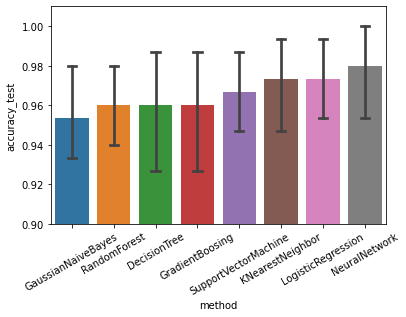

In [22]:
import seaborn as sns
ax = sns.barplot(x="method", y="accuracy_test", data=df_results, capsize=.2, 
                 order=df_results.groupby('method').mean().sort_values('accuracy_test').index)
ax.set(ylim=(0.90, 1.01))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

## 훈련 데이터셋 정확도 플랏

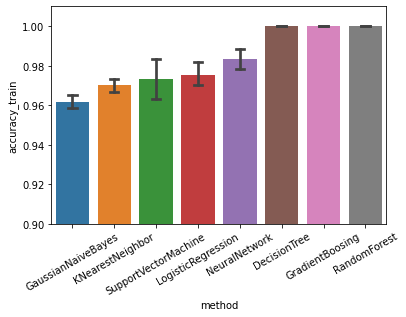

In [23]:
import seaborn as sns
ax = sns.barplot(x="method", y="accuracy_train", data=df_results, capsize=.2, 
                 order=df_results.groupby('method').mean().sort_values('accuracy_train').index)
ax.set(ylim=(0.90, 1.01))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

## 훈련-테스트 데이터셋 정확도 플랏

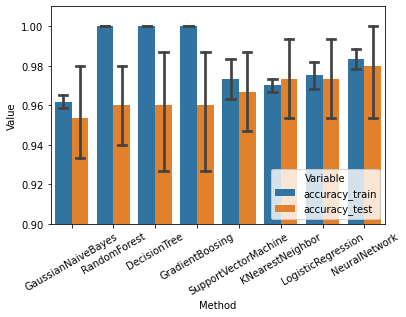

In [24]:
import seaborn as sns
tidy = df_results[['method', 'accuracy_train', 'accuracy_test']].melt(id_vars='method').rename(columns=str.title)
ax = sns.barplot(x="Method", y="Value", hue='Variable', data=tidy, capsize=.2, 
                 order=df_results.groupby('method').mean().sort_values('accuracy_test').index)
ax.set(ylim=(0.90, 1.01))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

## 학습 시간 플랏

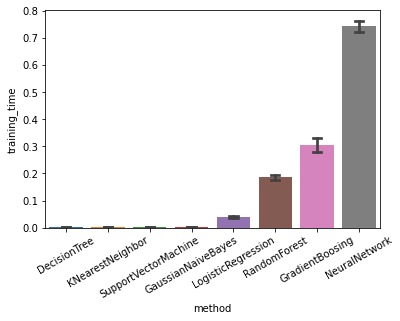

In [25]:
import seaborn as sns
ax = sns.barplot(x="method", y="training_time", data=df_results, capsize=.2, 
                 order=df_results.groupby('method').mean().sort_values('training_time').index)
#ax.set(ylim=(0.90, 1.01))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);

In [4]:
from sklearn.datasets import load_wine # scikit-learn의 샘플 데이터 로드를 위해 import
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 고수학 연산을 위해 임포트

wine = load_wine() # sample data load

# np.c_ is the numpy concatenate function
df = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
df['target'] = df['target'].map(dict(zip(range(3),wine.target_names)))


SyntaxError: invalid non-printable character U+00A0 (726008944.py, line 1)